# **E-commerce Sales Analysis**



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dataset
The dataset used for this project was found on Kaggle. objective of
this E-Commerce Sales Analysis is to gain valuable insights into the
online sales performance of the business.


In [3]:
dataset = pd.read_excel("Superstore_USA.xlsx")

The dataset contains the following Columns

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [5]:
dataset.head(5)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [6]:
dataset.shape

(9426, 24)

# Missing Value Analysis
- column product-based margin
contains 72 null values. here I use fillna() any method and fill
the null values with mean()

In [7]:
dataset.isnull().sum()

,0
Row ID,0
Order Priority,0
Discount,0
Unit Price,0
Shipping Cost,0
Customer ID,0
Customer Name,0
Ship Mode,0
Customer Segment,0
Product Category,0


 here I use fillna() any method and fill the null values with mean()

In [8]:
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace=True)

<ipython-input-8-416cfbce15de>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace=True)


In [9]:
# After Missing Value Analysis
dataset.isnull().sum()

,0
Row ID,0
Order Priority,0
Discount,0
Unit Price,0
Shipping Cost,0
Customer ID,0
Customer Name,0
Ship Mode,0
Customer Segment,0
Product Category,0


# Data Cleaning

In [10]:
dataset['Order Priority'].value_counts()

,count
Order Priority,
High,1970
Low,1926
Not Specified,1881
Medium,1844
Critical,1804
Critical,1


In [12]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

- In order priority a column I use replace()
method to replace “Critical ” to “critical”



In [11]:
dataset['Order Priority'] = dataset['Order Priority'].replace('Critical ','Critical')

In [13]:
# after data cleaning
dataset['Order Priority'].value_counts()

,count
Order Priority,
High,1970
Low,1926
Not Specified,1881
Medium,1844
Critical,1805


# Exploratory Data Analysis


# 1. Count of Order Priority



In [14]:
# Numerical analysis
dataset['Order Priority'].value_counts()

,count
Order Priority,
High,1970
Low,1926
Not Specified,1881
Medium,1844
Critical,1805


Here you can see the high have maximum and Critical have minmum order Priority

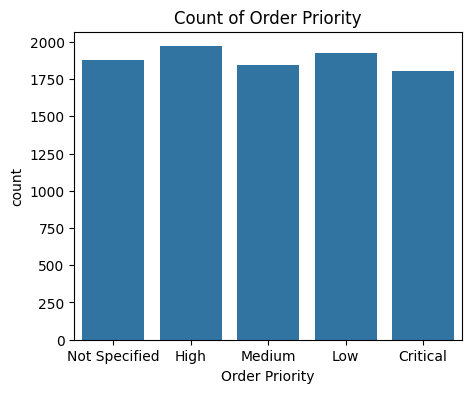

In [15]:
#Graphical analysis
plt.figure(figsize=(5,4))
sns.countplot(x="Order Priority",data=dataset)
plt.title("Count of Order Priority")
plt.savefig("Count of Order Priority.jpg")
plt.show()

# 2. Shipping mode analysis

In [16]:
dataset['Ship Mode'].value_counts()


,count
Ship Mode,
Regular Air,7036
Delivery Truck,1283
Express Air,1107


if we want to know how many products are being sold under which shipping mode

In [17]:
x = dataset['Ship Mode'].value_counts().index
y = dataset['Ship Mode'].value_counts().values

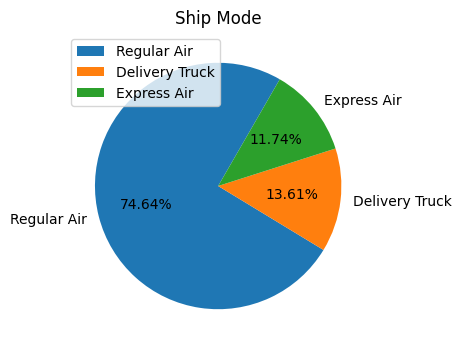

In [18]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,startangle=60,autopct="%0.2f%%")
plt.savefig("Ship Mode.jpg")
plt.title("Ship Mode")
plt.legend(loc=2)
plt.show()

Here we can see a regular air shipping mode have maximum sales and express air have minmum sales

# 3. Product category wise shipping mode


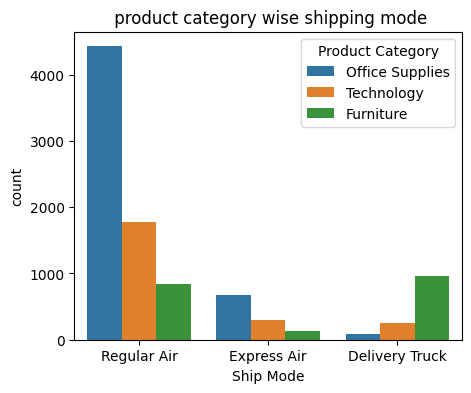

In [19]:
# Bilateral analysis
# product category wise shipping mode
plt.figure(figsize=(5,4))
sns.countplot(x="Ship Mode",data=dataset,hue="Product Category")
plt.savefig("Ship Mode_Product Category.jpg")
plt.title(" product category wise shipping mode")
plt.show()

Here we can see in regular air office supply have maximum sale and Furniture have minmum sales

# 4. Customer Segment analysis



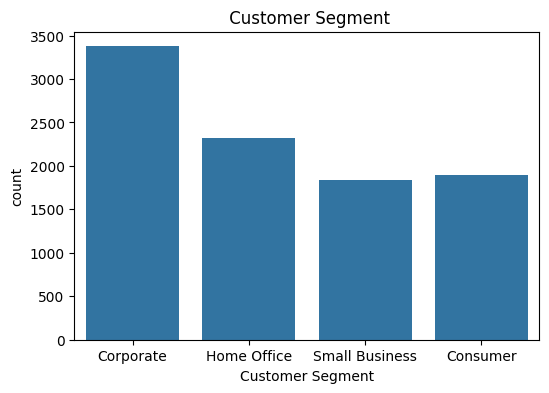

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x="Customer Segment",data=dataset)
plt.savefig("Customer Segment.jpg")
plt.title(" Customer Segment")
plt.show()

In customer segment we can see we have most customer from corporate and have a minimum customer from consumer

# 5. Product Category Analysis


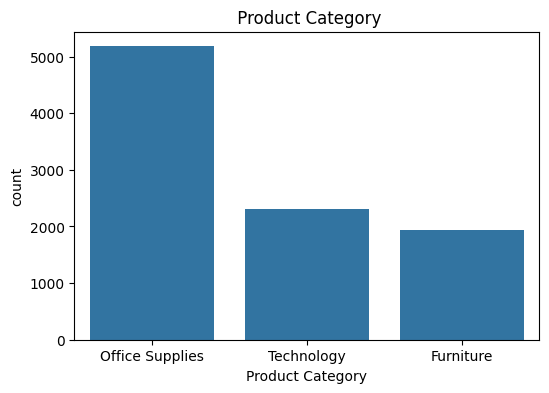

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x="Product Category",data=dataset)
plt.savefig("Product Category.jpg")
plt.title(" Product Category")
plt.show()

if we want to know maximum selling for which category?
Here we can see office supply have maximum selling and furniture have a minimum selling


# 6. Highest selling products in office supply

if we want to know Highest selling products in office supply?
Here we can see Paper is a Highest selling products in office supply


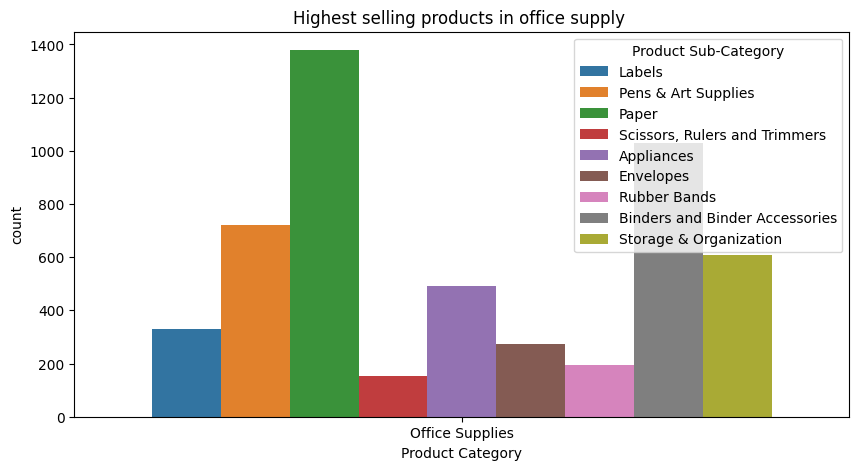

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x="Product Category",data = dataset[dataset["Product Category"]=="Office Supplies"],hue="Product Sub-Category")
plt.title("Highest selling products in office supply ")
plt.savefig("Highest selling products in office supply .jpg")
plt.show()

# 7. Highest selling products in Technology

if we want to know Highest selling products in Technology?
Here we can see Telephones and Communication is a Highest selling products in Technology


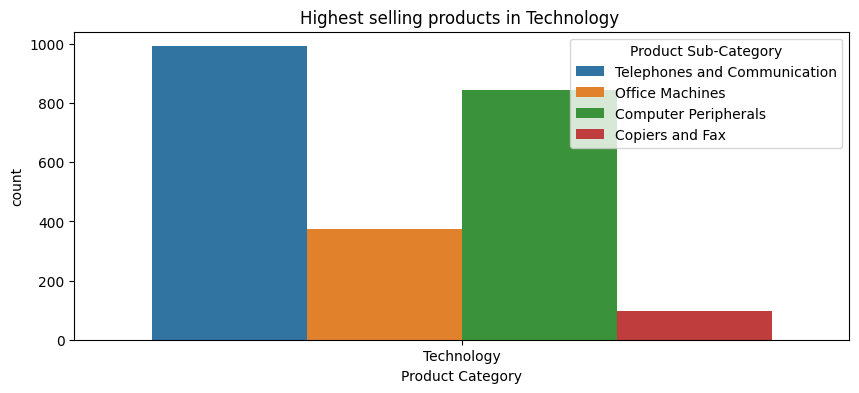

In [23]:
plt.figure(figsize=(10,4))
sns.countplot(x="Product Category",data = dataset[dataset["Product Category"]=="Technology"],hue="Product Sub-Category")
plt.title("Highest selling products in Technology ")
plt.savefig("Highest selling products in Technology  .jpg")
plt.show()

# 8. Highest selling products in Furniture

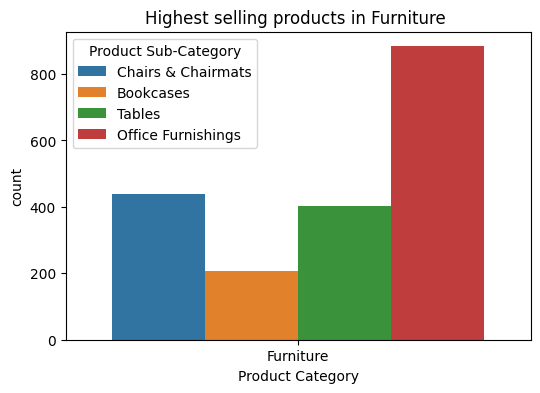

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x="Product Category",data = dataset[dataset["Product Category"]=="Furniture"],hue="Product Sub-Category")
plt.title("Highest selling products in Furniture ")
plt.savefig("Highest selling products in Furniture  .jpg")
plt.show()

# 9. Year By year Analysis
if we want to know how many sales were made in which year?
Here we can see in year 2013 we have maximum sales and 2010 we have minimum sales

In [25]:
dataset["Order year"] = dataset['Order Date'].dt.year

In [26]:
dataset["Order year"].value_counts()

,count
Order year,
2013,3054
2012,2241
2011,2179
2010,1952


here we also know year by year our order value is increased

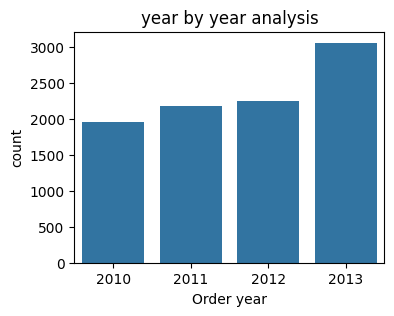

In [28]:
plt.figure(figsize=(4,3))
sns.countplot(x="Order year",data = dataset)
plt.title("year by year analysis")
plt.savefig("year by year analysis .jpg")
plt.show()

# 10.Product Category Wise Profit Analysis


if we want to know Product Category Wise Profit?
here we can see in technology we have a maximum profit , furniture have a minimum profit

<function matplotlib.pyplot.show(close=None, block=None)>

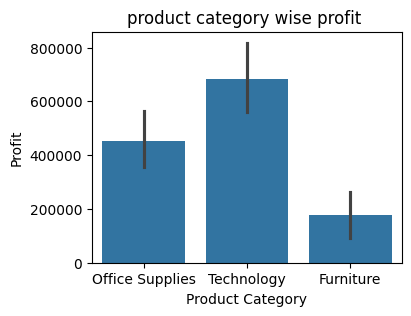

In [29]:
plt.figure(figsize=(4,3))
sns.barplot(x="Product Category",y="Profit",data=dataset,estimator="sum")
plt.title("product category wise profit ")
plt.savefig("product category wise profit  .jpg")
plt.show

# 11.State Wise Order Analysis
if we want to know top 5 state which have maximum sales

In [30]:
dataset["State or Province"].value_counts()[:5]

,count
State or Province,
California,1021
Texas,646
Illinois,584
New York,574
Florida,522


# 12. Product category wise Product Base Margin
if we want to know how much product base margin in which product
here we can see office supply have a maximum product based margin

<function matplotlib.pyplot.show(close=None, block=None)>

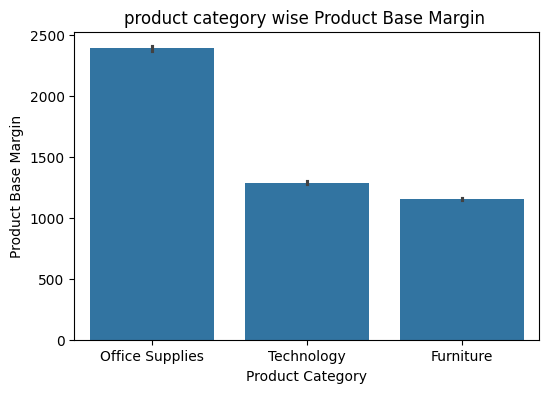

In [32]:
plt.figure(figsize=(6,4))
sns.barplot(x="Product Category",y="Product Base Margin",data=dataset,estimator="sum")
plt.title("product category wise Product Base Margin ")
plt.savefig("product category wise Product Base Margin  .jpg")
plt.show